In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Loading data

In [2]:
content = pd.read_csv(r"C:\Users\Vidhya Sagar\Downloads\Content.csv") 
reactions=pd.read_csv(r"C:\Users\Vidhya Sagar\Downloads\Reactions.csv")
reaction_types= pd.read_csv(r"C:\Users\Vidhya Sagar\Downloads\ReactionTypes.csv")
profile = pd.read_csv(r"C:\Users\Vidhya Sagar\Downloads\Profile.csv")
session = pd.read_csv(r"C:\Users\Vidhya Sagar\Downloads\Session.csv")

In [3]:
print('columns in content dataframe :', content.columns)
print('columns in reactions dataframe :', reactions.columns)
print('columns in reaction_type dataframe :', reaction_types.columns)
print('columns in profile dataframe :', profile.columns)
print('columns in session dataframe :', session.columns)

columns in content dataframe : Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Category', 'URL'], dtype='object')
columns in reactions dataframe : Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Datetime'], dtype='object')
columns in reaction_type dataframe : Index(['Unnamed: 0', 'Type', 'Sentiment', 'Score'], dtype='object')
columns in profile dataframe : Index(['Unnamed: 0', 'User ID', 'Interests', 'Age'], dtype='object')
columns in session dataframe : Index(['Unnamed: 0', 'User ID', 'Device', 'Duration'], dtype='object')


# Data Cleaning

In [4]:
''' as data frame has default coloumn(Unnamed:0) which isn't needed
so dropping the first column '''
content.drop('Unnamed: 0',axis=1,inplace=True)
reactions.drop(['Unnamed: 0','User ID'],axis=1,inplace=True)
reaction_types.drop('Unnamed: 0',axis=1,inplace=True)
profile.drop('Unnamed: 0',axis=1,inplace=True)
session.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
# merging all necessary data frames 
df = content.merge(profile, how='left', on='User ID')
df = df.merge(session, how='left', on='User ID')
df = df.merge(reactions, how='left', on='Content ID')
df = df.rename(columns={'Type_x':'Cont_Type','Type_y':'Type'})
df = df.merge(reaction_types, how='left', on='Type')
df = df.rename(columns={'Type':'React_Type'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25573 entries, 0 to 25572
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Content ID  25573 non-null  object 
 1   User ID     25573 non-null  object 
 2   Cont_Type   25573 non-null  object 
 3   Category    25573 non-null  object 
 4   URL         20857 non-null  object 
 5   Interests   25573 non-null  object 
 6   Age         25573 non-null  int64  
 7   Device      25573 non-null  object 
 8   Duration    25573 non-null  int64  
 9   React_Type  24573 non-null  object 
 10  Datetime    25553 non-null  object 
 11  Sentiment   24573 non-null  object 
 12  Score       24573 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 2.7+ MB


In [6]:
''' as our main focus is on finding the top 5 popular categories
so removing the unneccerary columns '''
df.drop(['URL','Interests'],axis=1,inplace=True)
df.columns

Index(['Content ID', 'User ID', 'Cont_Type', 'Category', 'Age', 'Device',
       'Duration', 'React_Type', 'Datetime', 'Sentiment', 'Score'],
      dtype='object')

In [7]:
#checking for null or missing values 
df.isnull().sum()

Content ID       0
User ID          0
Cont_Type        0
Category         0
Age              0
Device           0
Duration         0
React_Type    1000
Datetime        20
Sentiment     1000
Score         1000
dtype: int64

In [8]:
# removing rows having null values
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 1 to 25572
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Content ID  24573 non-null  object 
 1   User ID     24573 non-null  object 
 2   Cont_Type   24573 non-null  object 
 3   Category    24573 non-null  object 
 4   Age         24573 non-null  int64  
 5   Device      24573 non-null  object 
 6   Duration    24573 non-null  int64  
 7   React_Type  24573 non-null  object 
 8   Datetime    24573 non-null  object 
 9   Sentiment   24573 non-null  object 
 10  Score       24573 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 2.2+ MB


In [9]:
#checking for unique categories
df['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', 'Culture', '"food"', 'Food',
       '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [10]:
''' as we can see there is a extra Quatation mark(' " ') 
    present for some categories(For example ' "science "')
     so removing the extra quote '''

df['Category']= df['Category'].replace('"', '', regex=True)
df['Category']=df['Category'].str.lower()
df['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

# Analyzing the data

In [11]:
# finding the top 5 most popular categories
top5_cat = df.groupby('Category').agg({"React_Type" : "count"}).reset_index()
top5_cat=top5_cat.sort_values(by='React_Type', ascending=False).head(5)
top5_cat

,Category,React_Type
0,animals,1897
9,science,1796
7,healthy eating,1717
6,food,1699
12,technology,1698


# Interpreting The Results.

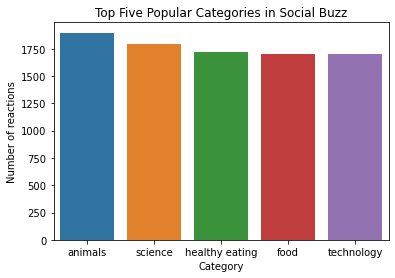

In [12]:
bar_chart=sns.barplot(x='Category',y='React_Type',data=top5_cat)
bar_chart.set_ylabel('Number of reactions')
plt.title('Top Five Popular Categories in Social Buzz')
plt.show()

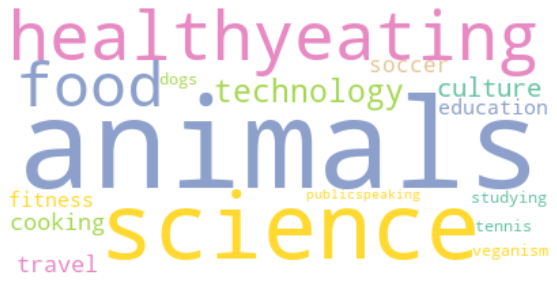

In [13]:
text1 = df['Category'].str.replace(" ","")
text2 = ' '.join(text1)
wordcloud2 = WordCloud( collocations=False,background_color = 'white',colormap='Set2').generate(text2)
# Generate plot
fig=plt.figure(figsize=(10,5))
plt.imshow(wordcloud2,interpolation="bilinear")
plt.axis("off")
plt.show()